# Trabajo Final LC: Etiquetadores morfosintácticos para el español
**Autor:** Santiago Millán Giner

### Tarea 1: Evaluación  del  etiquetador ‘hmm’  sobre  el  corpus ‘cess-esp’utilizando  el  juego  de categorías completo y reducido

> Utilizando el etiquetador hmm basado en modelos de Markov, se realizará una validación cruzada 
sobre 10 particiones del corpus. Barajar el corpus antes de realizar las particiones. Presentar los 
resultados en forma de tabla y gráficamente, incluyendo los intervalos de confianza.

In [25]:
# Cargar el corpus
import nltk
from nltk.corpus import cess_esp

corpus_sentences_view = cess_esp.tagged_sents()

print(corpus_sentences_view[0])

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]


In [26]:
# Barajar el corpus
import random

corpus_sentences = list(corpus_sentences_view)
random.shuffle(corpus_sentences)

print(corpus_sentences[0])

[('-', 'Fg'), ('-', 'Fg'), ('-', 'Fg'), ('*0*', 'sn.e-SUJ'), ('Es', 'vsip3s0'), ('una', 'di0fs0'), ('isla', 'ncfs000'), ('?', 'Fit')]


In [28]:
# Hacer 10 particiones
len_part = len(corpus_sentences)//10
corpus_part = [[] for _ in range(10)]
for i, sentence in enumerate(corpus_sentences):
    row = i // len_part
    corpus_part[row].append(sentence)

print(len(corpus_part))
for part in corpus_part:
    print(len(part))

10
603
603
603
603
603
603
603
603
603
603


In [31]:
# Crear un corpus con un juego de etiquetas límitado
corpus_sentences_R = []
for sentence in corpus_sentences:
    new_sentence = []
    
    for taged_word in sentence:
        word, tag = taged_word
        main_category = tag[0]

        if word == '*0*':
            continue

        if main_category == 'v':    # verbo
            new_tag = tag[:3]
        elif main_category ==  'F': # signo de puntuación
            new_tag = tag[:3]
        else:                       # otro
            new_tag = tag[:2]

        new_sentence.append((word, new_tag))

    corpus_sentences_R.append(new_sentence)

print(corpus_sentences_R[1])

# Hacer 10 particiones
corpus_part_R = [[] for _ in range(10)]
for i, sentence in enumerate(corpus_sentences_R):
    row = i // len_part
    corpus_part_R[row].append(sentence)

print(len(corpus_part_R))
for part in corpus_part_R:
    print(len(part))

[('La', 'da'), ('villa', 'nc'), ('había', 'vai'), ('nacido', 'vmp'), ('como', 'cs'), ('una', 'di'), ('excrescencia', 'nc'), ('cancerosa', 'aq'), (',', 'Fc'), ('desordenadamente', 'rg'), (',', 'Fc'), ('allí', 'rg'), ('donde', 'pr'), ('termina', 'vmi'), ('el', 'da'), ('asfalto', 'nc'), ('y', 'cc'), ('la', 'da'), ('esperanza', 'nc'), ('.', 'Fp')]
10
603
603
603
603
603
603
603
603
603
603


#### Completo

In [4]:
from nltk.tag import hmm

accs = []

for idx_test, test in enumerate(corpus_part):
    train = corpus_part[:] # copiar
    train.pop(idx_test) # eliminar test

    '''
    # Mostrar el id particiones de entrenamiento
    for p in train:
        print(id(p))
    print()
    '''

    train = [item for sublist in train for item in sublist] # aplanar

    tagger = hmm.HiddenMarkovModelTagger.train(train)
    accs.append(tagger.accuracy(test))

In [39]:
import scipy.stats as stats
import numpy as np

def confidence_interval(accs, prob=0.95):
    # Calcular la media y el error estándar de la media
    mean = np.mean(accs)
    sem = stats.sem(accs)
    
    # Calcular el intervalo de confianza
    interval = stats.t.interval(prob, len(accs)-1, loc=mean, scale=sem)
    
    return f"{mean*100:.2f} ± {(interval[1]-interval[0])/2*100:.2f}% = [{interval[0]:.4f}, {interval[1]:.4f}]"


In [26]:
confidence_interval(accs)

'89.65 ± 0.21% = [0.8944, 0.8986]'

(0.0, 1.0)

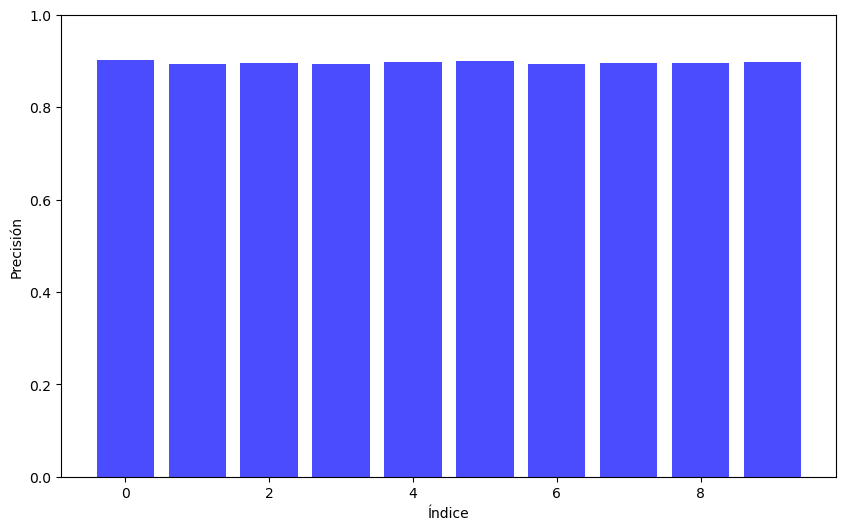

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(accs)), accs, color='blue', alpha=0.7)
    
plt.xlabel('Índice')
plt.ylabel('Precisión')

plt.ylim(0, 1)

In [35]:
import pandas as pd
df = pd.DataFrame({'Precisión': accs})
df

,Precisión
0,0.902726
1,0.894018
2,0.895029
3,0.894077
4,0.897296
5,0.900041
6,0.893084
7,0.895966
8,0.895916
9,0.897070


Como podemos observar el modelo siempre alcanza una precisión muy cercana al 90% con poco margen de error, sin importar la parte corpus que se ha utilizado como test o entrenamiento, usando las etiquetas completas.

#### Reducido

In [36]:
accs_R = []
for idx_test, test in enumerate(corpus_part_R):
    train = corpus_part_R[:] # copiar
    train.pop(idx_test) # eliminar test

    '''
    # Mostrar el id particiones de entrenamiento
    for p in train:
        print(id(p))
    print()
    '''

    train = [item for sublist in train for item in sublist] # aplanar

    tagger = hmm.HiddenMarkovModelTagger.train(train)
    accs_R.append(tagger.accuracy(test))

(0.0, 1.0)

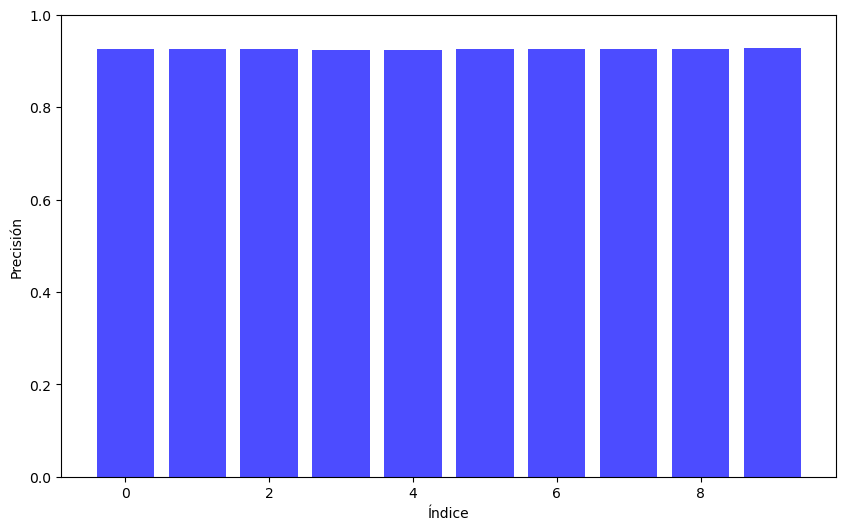

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(accs_R)), accs_R, color='blue', alpha=0.7)
    
plt.xlabel('Índice')
plt.ylabel('Precisión')

plt.ylim(0, 1)

In [38]:
import pandas as pd
df = pd.DataFrame({'Precisión': accs_R})
df

,Precisión
0,0.926726
1,0.926661
2,0.925778
3,0.923956
4,0.924122
5,0.926262
6,0.925230
7,0.925887
8,0.926190
9,0.928783


In [40]:
confidence_interval(accs_R)

'92.60 ± 0.10% = [0.9250, 0.9269]'

### Tarea  2:  Evaluación  de  las  prestaciones  del  etiquetador  respecto  a  la  cantidad  de  datos  de aprendizaje

> Se trata de estudiar cómo varían las prestaciones del etiquetador hmm cuando varía el tamaño del corpus de aprendizaje. Para este experimento se dividirá el corpus de entrenamiento en 10 partes de  tamaño similar. La  partición  10 se  tomará como test, y las 9 particiones restantes se tomarán como entrenamiento. En cada ejecución,se irá incrementando sucesivamente el tamaño del corpus de entrenamiento, manteniendo fija la partición de test.


In [7]:
# Aplana un nivel la lista
def flatten(list):
    return [item for sublist in list for item in sublist]

In [9]:
from nltk.tag import hmm

# Utilizar el último para test, para entramiento va incrementando de solo el primero hasta el penúltimo
accs = [hmm.HiddenMarkovModelTagger.train(flatten(corpus_part[:i])).accuracy(corpus_part[9]) for i in range(1,10)]

,Precisión
1,0.785229
2,0.824803
3,0.846997
4,0.859672
5,0.868496
6,0.878175
7,0.885395
8,0.889887
9,0.894059


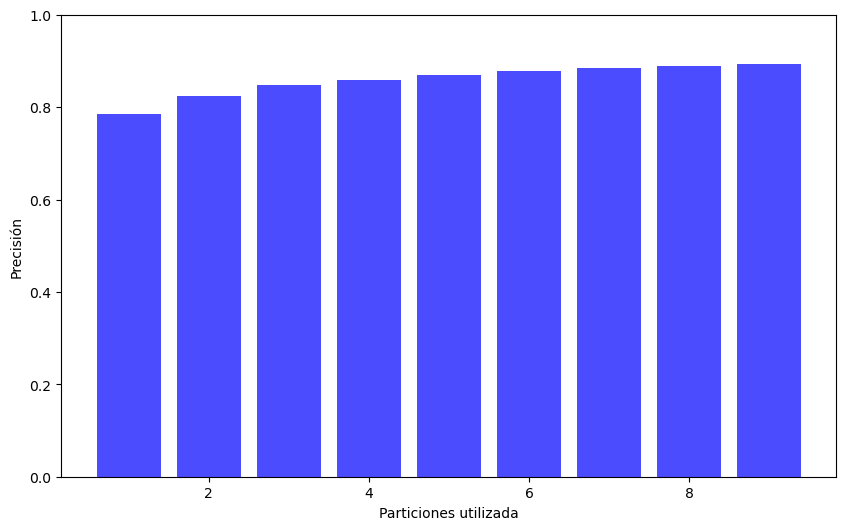

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.bar(range(1,10), accs, color='blue', alpha=0.7)
    
plt.xlabel('Particiones utilizada')
plt.ylabel('Precisión')

plt.ylim(0, 1)

df = pd.DataFrame({'Precisión': accs})
df.index = df.index+1
df

La precisión aumenta conforme vamos aumentado la longitud del entrenamiento. Conforme vamos añadiendo más muestras, la mejora de la precisión va dismunyendo a medida que aumentamos la talla, pero nunca empeora.

### Tarea 3: Evaluación del método de suavizado para palabras desconocidaspara el etiquetador tnt


>El etiquetador tnt por defecto no incorpora un método de suavizado para las palabras desconocidas. Utiliza  un  método  basado  en  los  sufijos  de  las  palabras  para  construir  un  modelo  para  las  palabras desconocidas(Affix  Tagger).  En  base  al  sufijo  de  la  palabra  desconocida  le  asigna  una  categoría morfosintáctica. Este método funcionarazonablementebien para el inglés. En concreto,se trata de estudiar diferentes longitudes del sufijo (número de letras que se tienen en cuenta) y estudiar cómo varían las prestaciones del etiquetador.

> Una vez se haya decidido el sufijo que mejores prestaciones proporciona, incorporarlo como modelo de suavizado al etiquetador tnt y comprobar si aumenta susprestaciones

Primero pruebo el Affix tagger con sufijos de 1 a 7, estableciendo la longitud del sufijo en la variable affix_tagger como un valor negativo

In [41]:
from nltk.tag import AffixTagger

accs_matrix = [[] for _ in range(10)]   # [idx_fold][suffix_len-1]

for idx_test, test in enumerate(corpus_part):
    train = corpus_part[:] # copiar
    train.pop(idx_test) # eliminar test

    '''
    # Mostrar el id particiones de entrenamiento
    for p in train:
        print(id(p))
    print()
    '''

    train = [item for sublist in train for item in sublist] # aplanar

    accs_matrix[idx_test] = []

    for suffix_len in range(1, 7):
        affix_tagger = AffixTagger(train=train, affix_length=-suffix_len)
        accs_matrix[idx_test].append(affix_tagger.accuracy(test))


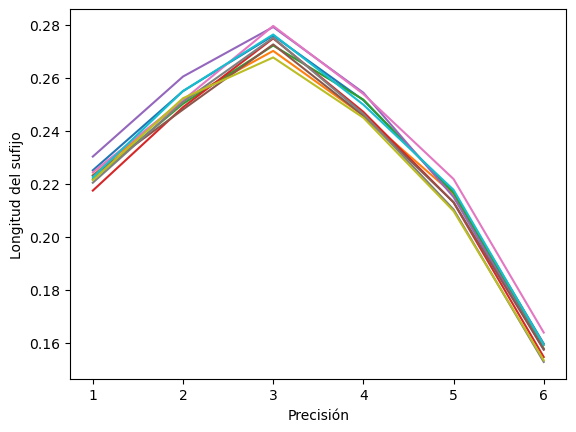

In [44]:
for idx_fold, accs_fold in enumerate(accs_matrix):
    plt.plot([suffix_len for suffix_len in range(1,7)], accs_fold, label=f'fold {idx_fold}')

plt.xlabel("Precisión")
plt.ylabel("Longitud del sufijo")

plt.show()
    

In [63]:
def transpose(matrix):
    return [list(row) for row in zip(*matrix)]

accs_matrix = transpose(accs_matrix)

In [61]:
for suffix_len_l1 in range(0,6):
    print("Longitud del sufijo = ", suffix_len_l1+1)
    df = pd.DataFrame({'Precisión': accs_matrix[suffix_len_l1], 'Intervalo de confianza del 95%': confidence_interval(accs_matrix[suffix_len_l1])})
    print(df, "\n")

Longitud del sufijo =  1
   Precisión    Intervalo de confianza del 95%
0   0.225132  22.30 ± 0.24% = [0.2206, 0.2254]
1   0.223284  22.30 ± 0.24% = [0.2206, 0.2254]
2   0.221773  22.30 ± 0.24% = [0.2206, 0.2254]
3   0.217488  22.30 ± 0.24% = [0.2206, 0.2254]
4   0.230327  22.30 ± 0.24% = [0.2206, 0.2254]
5   0.223104  22.30 ± 0.24% = [0.2206, 0.2254]
6   0.224373  22.30 ± 0.24% = [0.2206, 0.2254]
7   0.220451  22.30 ± 0.24% = [0.2206, 0.2254]
8   0.221455  22.30 ± 0.24% = [0.2206, 0.2254]
9   0.222575  22.30 ± 0.24% = [0.2206, 0.2254] 

Longitud del sufijo =  2
   Precisión    Intervalo de confianza del 95%
0   0.255050  25.24 ± 0.26% = [0.2498, 0.2550]
1   0.251584  25.24 ± 0.26% = [0.2498, 0.2550]
2   0.250259  25.24 ± 0.26% = [0.2498, 0.2550]
3   0.248965  25.24 ± 0.26% = [0.2498, 0.2550]
4   0.260543  25.24 ± 0.26% = [0.2498, 0.2550]
5   0.248094  25.24 ± 0.26% = [0.2498, 0.2550]
6   0.251587  25.24 ± 0.26% = [0.2498, 0.2550]
7   0.250967  25.24 ± 0.26% = [0.2498, 0.2550]
8   0.25

Con bastante diferencia, con letras una longitud de 3 letras como sufijo alcanza el Affix Tagger su máxima precisión. Aunque la precisión del modelo solo es bastante mala no llegando al acanzar ni si quiera el 30% en el mejor de los casos.

In [26]:
accs = []

for idx_test, test in enumerate(corpus_part):
    train = corpus_part[:] # copiar
    train.pop(idx_test) # eliminar test

    '''
    # Mostrar el id particiones de entrenamiento
    for p in train:
        print(id(p))
    print()
    '''

    train = [item for sublist in train for item in sublist] # aplanar

    tnt_tagger = nltk.TnT(unk=nltk.AffixTagger(affix_length=-3, train=train), Trained=True)
    tnt_tagger.train(train)

    accs.append(tnt_tagger.accuracy(test))


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

Intervalo de confianza del 95% =  93.46 ± 0.15% = [0.9330, 0.9361]


,Precisión
0,0.933620
1,0.937220
2,0.935816
3,0.933905
4,0.932098
5,0.936228
6,0.932554
7,0.932242
8,0.938109
9,0.933778


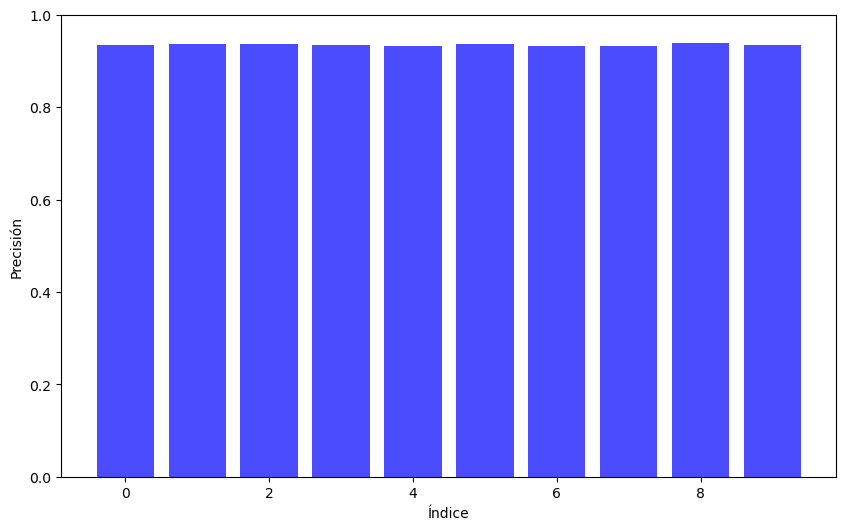

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(accs)), accs, color='blue', alpha=0.7)
    
plt.xlabel('Índice')
plt.ylabel('Precisión')

plt.ylim(0, 1)

print("Intervalo de confianza del 95% = ", confidence_interval(accs, 0.95))

df = pd.DataFrame({'Precisión': accs})
df

### Tarea 4: Evaluación del resto de etiquetadores

> Se deberán utilizar otros paradigmas de etiquetado. Como mínimo, el etiquetador de Brill y algún otro como CRF o Perceptron. Se deberá realizar una comparativa de prestaciones respecto a los etiquetadores TnT y HMM, utilizando el juego de categorías reducido.

> Cuando se utilice el etiquetador de Brill, se debe probar con diferentes etiquetados iniciales, por ejemplo, con Unigram Tagger y con HMM Tagger. La comparación puede ser solo de una partición, si el coste temporal de la validación cruzada requiere mucho tiempo.

In [ ]:
# Con validación cruzada tarda mucho
import nltk
from nltk.tag import brill, brill_trainer, PerceptronTagger, hmm

accs_brill_tnt = []
accs_brill_hmm = []
accs_perceptron = []

for idx_test, test in enumerate(corpus_part_R):
    train = corpus_part_R[:] # copiar
    train.pop(idx_test) # eliminar test

    '''
    # Mostrar el id particiones de entrenamiento
    for p in train:
        print(id(p))
    print()
    '''

    train = [item for sublist in train for item in sublist] # aplanar

    # Brill HMM
    hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
    templates = brill.fntbl37()
    trainer = brill_trainer.BrillTaggerTrainer(hmm_tagger, templates)
    brill_tagger = trainer.train(train)
    accs_brill_hmm.append(brill_tagger.accuracy(test))
    print("hmm", idx_test)

    # Brill TnT
    tnt_tagger = nltk.TnT(unk=nltk.AffixTagger(affix_length=-3, train=train), Trained=True)
    tnt_tagger.train(train)
    templates = brill.fntbl37()
    trainer = brill_trainer.BrillTaggerTrainer(tnt_tagger, templates)
    brill_tagger = trainer.train(train)
    accs_brill_tnt.append(brill_tagger.accuracy(test))
    print("brill", idx_test)

    # Perceptron
    perceptron_tagger = PerceptronTagger(load=False, lang='esp')
    perceptron_tagger.train(train)
    accs_perceptron.append( perceptron_tagger.accuracy(test) )
    print("brill", idx_test)


    print(idx_test)



In [ ]:
idx_test = 0
test = corpus_part_R[0]

train = corpus_part_R[:] # copiar
train.pop(idx_test) # eliminar test

'''
# Mostrar el id particiones de entrenamiento
for p in train:
    print(id(p))
print()
'''

train = [item for sublist in train for item in sublist] # aplanar

# Brill HMM
hmm_tagger = hmm.HiddenMarkovModelTagger.train(train)
templates = brill.fntbl37()
trainer = brill_trainer.BrillTaggerTrainer(hmm_tagger, templates)
brill_tagger = trainer.train(train)
accs_brill_hmm = brill_tagger.accuracy(test)
print("hmm",accs_brill_hmm)

# Brill TnT
tnt_tagger = nltk.TnT(unk=nltk.AffixTagger(affix_length=-3, train=train), Trained=True)
tnt_tagger.train(train)
templates = brill.fntbl37()
trainer = brill_trainer.BrillTaggerTrainer(tnt_tagger, templates)
brill_tagger = trainer.train(train)
accs_brill_tnt = brill_tagger.accuracy(test)
print("brill", accs_brill_tnt)

# Perceptron
perceptron_tagger = PerceptronTagger(load=False, lang='esp')
perceptron_tagger.train(train)
accs_perceptron = perceptron_tagger.accuracy(test)
print("perceptron", accs_perceptron)

In [49]:
print([accs_brill_hmm, accs_brill_tnt, accs_perceptron])

[0.9306437950021178, 0.9508153324862346, 0.9641041931385006]


<BarContainer object of 3 artists>

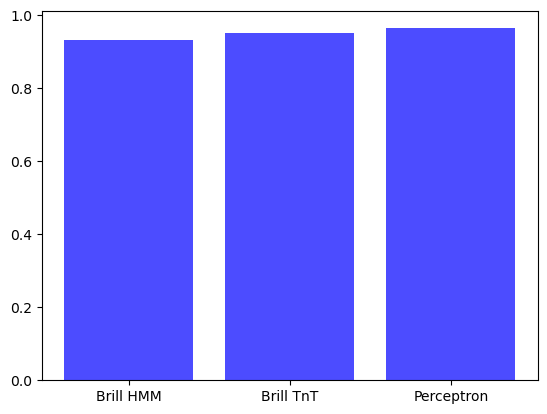

In [50]:
plt.bar(["Brill HMM", "Brill TnT", "Perceptron"], [accs_brill_hmm, accs_brill_tnt, accs_perceptron], color='blue', alpha=0.7)

In [9]:
print(accs_brill)

[0.8920928256598163, 0.8954190525767829, 0.8939426600560466, 0.8909400582385584, 0.8932740709007175, 0.89401833092137, 0.8862751127511275, 0.8898066175379593, 0.8920085296506904, 0.8905389095870284]


In [10]:
print(accs_perceptron)

[0.9475333227125484, 0.9487766788131181, 0.9490191851692175, 0.9475303554749739, 0.9438791903180893, 0.944187168355041, 0.9472119721197212, 0.9481675651614818, 0.9499390739236393, 0.9480505850868447]


In [34]:
accs_brill = [0.8920928256598163, 0.8954190525767829, 0.8939426600560466, 0.8909400582385584, 0.8932740709007175, 0.89401833092137, 0.8862751127511275, 0.8898066175379593, 0.8920085296506904, 0.8905389095870284]
accs_perceptron = [0.9475333227125484, 0.9487766788131181, 0.9490191851692175, 0.9475303554749739, 0.9438791903180893, 0.944187168355041, 0.9472119721197212, 0.9481675651614818, 0.9499390739236393, 0.9480505850868447]

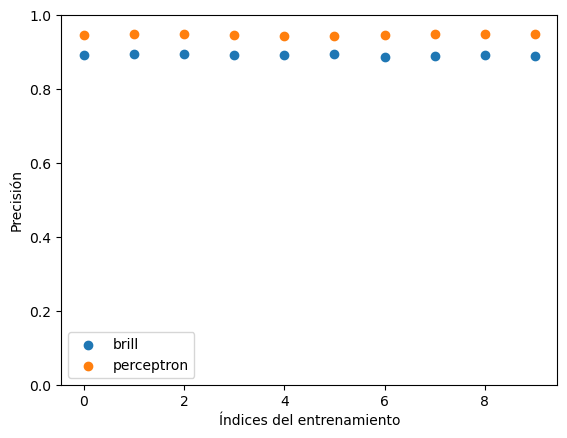

In [41]:
folds_idx = [i for i in range(0,10)]
plt.scatter(folds_idx, accs_brill, label="brill")
plt.scatter(folds_idx, accs_perceptron, label="perceptron")
plt.xlabel("Índices del entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.ylim(0, 1)
plt.show()

In [43]:
print("Intervalo de confianza del 95% = ", confidence_interval(accs_brill, 0.95))

df = pd.DataFrame({'Precisión': accs_brill})
df

Intervalo de confianza del 95% =  89.18 ± 0.19% = [0.8900, 0.8937]


,Precisión
0,0.892093
1,0.895419
2,0.893943
3,0.890940
4,0.893274
5,0.894018
6,0.886275
7,0.889807
8,0.892009
9,0.890539


In [44]:
print("Intervalo de confianza del 95% = ", confidence_interval(accs_perceptron, 0.95))

df = pd.DataFrame({'Precisión': accs_perceptron})
df

Intervalo de confianza del 95% =  94.74 ± 0.14% = [0.9460, 0.9488]


,Precisión
0,0.947533
1,0.948777
2,0.949019
3,0.947530
4,0.943879
5,0.944187
6,0.947212
7,0.948168
8,0.949939
9,0.948051


Podemos observar el modelo de perceptrón simple es mejor que modelo de brill usando un etiquetador de unigramas con las 37 plantillas del sistema fntbl37. La diferencia es del 5%, por lo tanto es bastante notable. No obstante el modelo de Brill tarda mucho menos en entrenarse que el modelo de perceptron.

### Tarea 5

> Se  deberárealizaral  menos el  estudio  de una  de  las siguientes  herramientas. En dicho  estudio  se debe   contemplar aspectos   como: facilidad/problemas   de   instalación,   facilidad   de   uso, documentación, funcionalidad, etc.  Con cada herramienta estudiada se deberá realizar el etiquetado morfosintáctico del texto del fichero Alicia.txt. Se debe entregar un fichero tipo textoc on el formato: palabra/etiqueta.  Además, se  debe  explorar  la  posibilidad  de  etiquetar  el  fichero  Alicia.txt  con entidades nombradas(NE)

El proceso de instalación de spacy ha sido realmente sencillo y rápido. Simplemente me he dirigido a el enlace proporcionado y en el ejemplo de código de que proporcionado por el sitio web, he copiado la primera línea de código. Para descargar el etiquetador en español, he cambiado hecho el mismo proceso con la segunda línea del ejemplo, que descarga el etiquetador en inglés, no obstante he sustituido "en" por "es".

In [ ]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

In [60]:
import spacy

nlp = spacy.load("es_core_news_sm")
with open("Alicia_utf8.txt", "r", encoding="utf-8") as file:
    text = file.read()

doc = nlp(text)

with open("Alicia_etiquetado.txt", "w", encoding="utf-8") as out_file:
    for token in doc:
        out_file.write(f"{token.text}/{token.pos_}\n")

with open("Alicia_entidades.txt", "w", encoding="utf-8") as out_file:
    for ent in doc.ents:
        out_file.write(f"{ent.text}/{ent.label_}\n")


In [64]:
with open("Alicia_entidades.txt", "r", encoding="utf-8") as file:
    text = file.read()
print(text)

La primera/MISC
Conseguido al fin el silencio/MISC
Ya/MISC
País de las Maravillas/LOC
Ponlo/LOC



El etiquetado parace correcto, pero no parece encontrar muchas entidades. Por ello, he descargado la versión grande del modelo, pero aún así reconoce un número muy límitado de entidades.

In [ ]:
!python -m spacy download es_core_news_lg

In [70]:
nlp = spacy.load("es_core_news_lg")
with open("Alicia_utf8.txt", "r", encoding="utf-8") as file:
    text = file.read()

doc = nlp(text)

with open("Alicia_etiquetado.txt", "w", encoding="utf-8") as out_file:
    for token in doc:
        out_file.write(f"{token.text}/{token.pos_}\n")

with open("Alicia_entidades.txt", "w", encoding="utf-8") as out_file:
    for ent in doc.ents:
        out_file.write(f"{ent.text}/{ent.label_}\n")

In [72]:
with open("Alicia_entidades.txt", "r", encoding="utf-8") as file:
    text = file.read()
print(text)

Mas/MISC
La primera/MISC
La segunda/MISC
Conseguido al fin el silencio/MISC
País de las Maravillas/LOC
Alicia, para ti este cuento infantil/MISC
Ponlo/LOC

